In [ ]:
# NOTE: Make sure you have added the dataset into the notebook
# Move the code to working directory
!mkdir /kaggle/working/src
!cp -r /kaggle/input/nanogpt-code/* /kaggle/working/src

# install necessary packages, as Kaggle will clear installed packages when restart the kernel.
%pip install torch numpy transformers datasets tiktoken wandb tqdm

%cd /kaggle/working/src
!ls

In [ ]:
# NOTE: Make sure you turn on the GPU when running the script
# TODO: Change this line to the script you want to execute
# !python <script_name.py> 

!python data/shakespeare_char/prepare.py # prepare data
!python train.py config/train_shakespeare_char.py # training

Report the final loss at iteration 5000: train loss: 1.6065, val loss: 1.6950


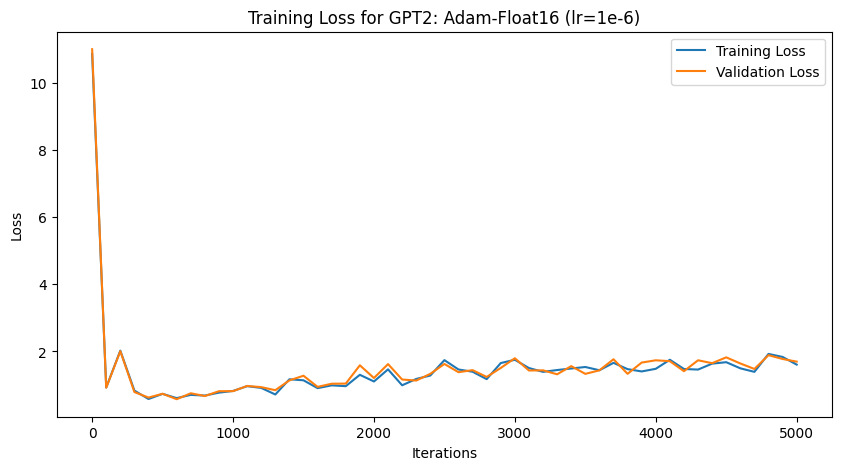

In [45]:
import matplotlib.pyplot as plt
import pickle

with open('./out-instruction-tuning/loss_values.pkl', 'rb') as f:
    losses = pickle.load(f)

# Extract the training and validation loss values
train_losses = [d['train'].item() for d in losses]  # Convert tensors to Python numbers
val_losses = [d['val'].item() for d in losses]

print(f"Report the final loss at iteration 5000:",
      f"train loss: {train_losses[-1]:.4f}, val loss: {val_losses[-1]:.4f}")

# Create a range of epochs
iterations = range(0, 5100, 100)

plt.figure(figsize=(10, 5))
# Plot the training and validation losses
plt.plot(iterations, train_losses, label='Training Loss')
plt.plot(iterations, val_losses, label='Validation Loss')

# Add titles and labels
plt.title('Training Loss for GPT2: Adam-Float16 (lr=1e-6)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()